In [1]:
# Install Open3d
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pi

In [2]:
# Import required library
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import yaml
from PIL import Image
import cv2

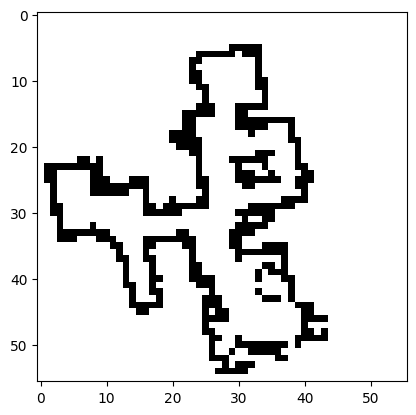

In [101]:
# Load PCD file of map
target = o3d.io.read_point_cloud('/content/29_16_42_29_273771_final_map_mod2.pcd')

# Specify size and resolution of map
gridSizeMeters = 14
res = 0.25

# Calculate grid size and center location
gridSize = gridSizeMeters/res
center = [-10/res, -2.5/res]

# Initialize Occupancy Map
occGrid = 255*np.ones((int(gridSize),int(gridSize),3), dtype=np.uint8)

pts = np.asarray(target.points)
# Loop through each point in point cloud
num_pts = pts.shape
for i in range(0, num_pts[0]):

  # Set location in Occupancy Map to occupied
  location = -pts[i,:2]/res + center
  occGrid[int(location[0]),int(location[1])] = [0,0,0]

# Rotate map to be consistent with frame
occGrid = np.rot90(occGrid, -1, (0,1))

# Show Occupancy Map
plt.imshow(occGrid, interpolation='none')
plt.show()

In [102]:
# Create Occupancy Map YAML Strucutre
occupancy_grid = dict()
occupancy_grid['resolution'] = res
occupancy_grid['origin'] = [-10, -2.5, 0.0]
occupancy_grid['negate'] = 0
occupancy_grid['occupied_thresh'] = 1.0
occupancy_grid['free_thresh'] = 0.0
occupancy_grid['image'] = 'occupancy_map_final_v8.png'
occupancy_grid['mode'] = "scale"

# Write Occupancy Map YAML
with open('occupancy_map_final_v8.yaml', 'w') as fp:
    yaml.dump(occupancy_grid, fp)

# Save Occupancy Map image
img = Image.fromarray(occGrid)
img.save('occupancy_map_final_v8.png')